# Convolutional Neural Network (CNN) example

Adapted for our datasets

More examples: https://www.tensorflow.org/tutorials/keras/classification?_gl=1*gdwjae*_up*MQ..*_ga*MTgyODY0OTQxMS4xNzYyOTc0NTQ1*_ga_W0YLR4190T*czE3NjI5NzQ1NDUkbzEkZzAkdDE3NjI5NzQ1NDUkajYwJGwwJGgw

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt


from google.colab import drive, files
drive.mount('/content/drive') # mount your google colab file

Mounted at /content/drive


### Download and prepare the dataset -- INSTEAD use your own datasets!



The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Edit your own folder
import pathlib

data_dir = pathlib.Path('/content/drive/MyDrive/ML_IPData1/').with_suffix('')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

269


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


In [ ]:
batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels = "inferred",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels = "inferred",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 269 files belonging to 3 classes.
Using 216 files for training.
Found 269 files belonging to 3 classes.
Using 53 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Cat', 'Fedora', 'Piano']


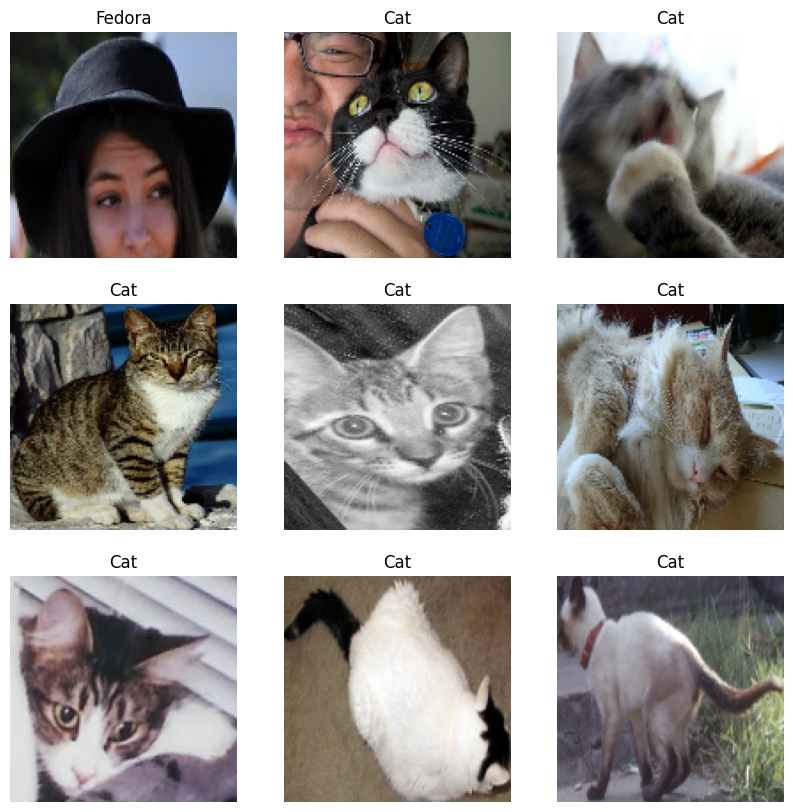

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

num_classes = 3

model = tf.keras.Sequential(tf.keras.layers.Rescaling(1./255),...


Continue implementing the CNN.

In [ ]:
num_classes = 3

#....

#Layers

Use  a stack of layers (Conv2D, MaxPooling2D) as discussed in the lecture.

### Add Dense layers on top

To complete the model, feed the last output tensor from the convolutional base into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top.

### Compile and train the model

example

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])



If you execute the following cell several times, it will continue the training from the previous execution. To reset the weights, execute the compile command in the cell above.


In [ ]:

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 399ms/step - accuracy: 0.3956 - loss: 1.5365 - val_accuracy: 0.6415 - val_loss: 1.0406
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.4987 - loss: 1.0248 - val_accuracy: 0.6226 - val_loss: 0.7949
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.6052 - loss: 0.9225 - val_accuracy: 0.6792 - val_loss: 0.7410
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.6523 - loss: 0.7506 - val_accuracy: 0.6226 - val_loss: 0.7111
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.7462 - loss: 0.5963 - val_accuracy: 0.6981 - val_loss: 0.6704
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.7483 - loss: 0.5907 - val_accuracy: 0.7358 - val_loss: 0.6470
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.8508 - loss: 0.3900 - val_accuracy: 0.6981 - val_loss: 0.7059
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.9119 - loss: 0.2467 - val_accuracy: 0.7170 - val_loss:

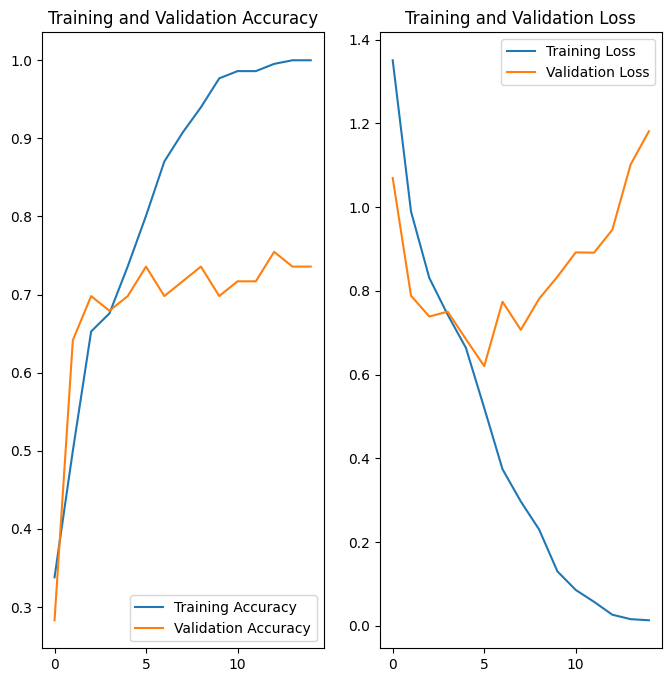

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Here's the complete architecture of your model:

In [ ]:
model.summary()

The output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

In [ ]:
import numpy as np

# Get one batch from the validation dataset
for images, labels in val_ds.take(1):
    # Get the batch size from the current batch
    current_batch_size = images.shape[0]
    # Select a random index within the current batch
    random_index = tf.random.uniform(shape=[], minval=0, maxval=current_batch_size, dtype=tf.int32)

    # Select the random image and its true label
    random_image = images[random_index]
    true_label = labels[random_index].numpy()

    # Add a batch dimension to the image for prediction
    preprocessed_image = tf.expand_dims(random_image, axis=0)

    print(f"Selected image shape before preprocessing: {random_image.shape}")
    print(f"Selected image shape after adding batch dimension: {preprocessed_image.shape}")
    print(f"True label: {class_names[true_label]}")

Selected image shape before preprocessing: (128, 128, 3)
Selected image shape after adding batch dimension: (1, 128, 128, 3)
True label: Cat


In [ ]:
predictions = model.predict(preprocessed_image)

# The model now outputs probabilities directly due to the Softmax layer
probabilities = predictions

# Get the predicted label index and its confidence
predicted_label_index = np.argmax(probabilities)
predicted_confidence = np.max(probabilities)
predicted_label = class_names[predicted_label_index]

print(f"Model predictions (probabilities): {probabilities}")
#print(f"Predicted label: {predicted_label} (Confidence: {predicted_confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model predictions (probabilities): [[9.9986875e-01 3.3546993e-07 1.3084771e-04]]


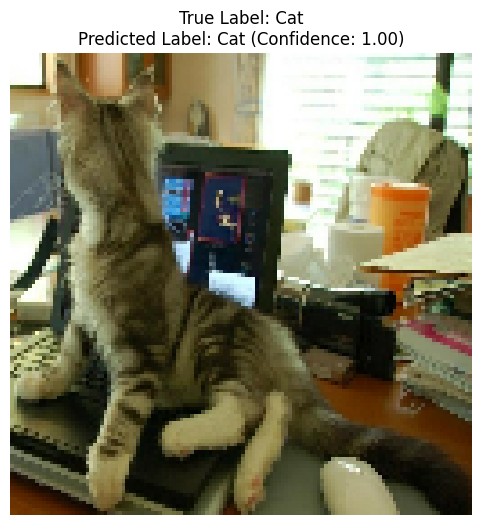

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(random_image.numpy().astype("uint8"))
plt.title(f"True Label: {class_names[true_label]}\nPredicted Label: {predicted_label} (Confidence: {predicted_confidence:.2f})")
plt.axis("off")
plt.show()